In [ ]:
# Import the libraries

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from google.colab import drive


Below is the source of the original database. For the purposes of this project, audio files from male and female voices were organized into Google Drive folders, from which the signals (audios) are taken and likewise where the pre-processed signals (spectrograms) are sent.

Original database source: http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/

Google drive folders (With 1332 samples each (MALE, FEMALE)): https://drive.google.com/drive/folders/13OgABoHS8rrosW_Z4j6RycLf-JjFXt8y?usp=sharing

Note: Should be created the output folders in order to save the pre processed information.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


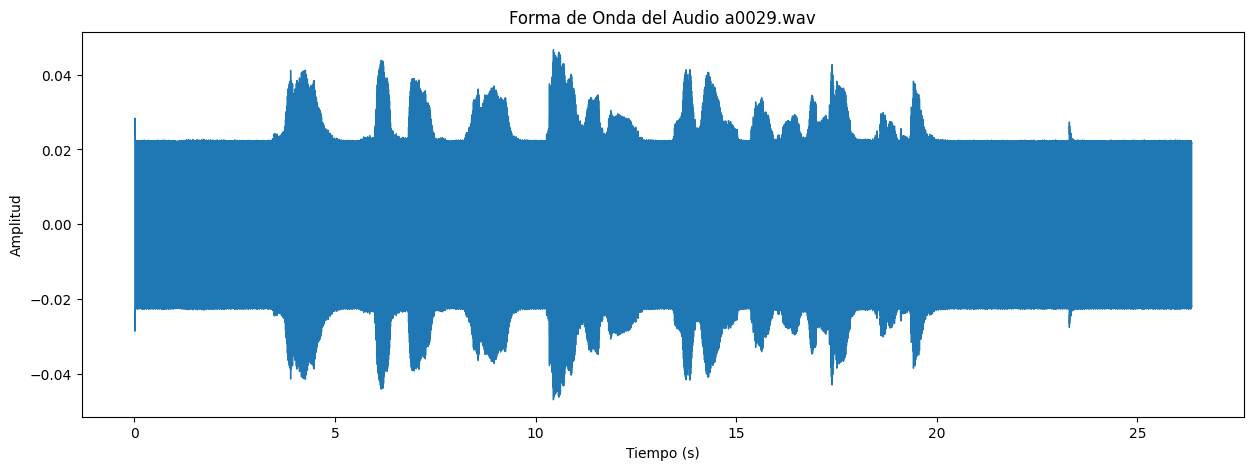

In [ ]:
import gdown
# Local path of the audio file
audio_path = '/content/drive/MyDrive/genderRecognition/raw_data/Female/a0029.wav'

# Load the audio signal using librosa
y, sr = librosa.load(audio_path)
# Waveform visualization settings
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=8000)
# Plot settings
plt.title('Waveform of Audio a0029.wav')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# Show the plot
plt.show()

In [ ]:
# Input folder path (where the .wav files are located)
input_folder = '/content/drive/MyDrive/genderRecognition/raw_data/Female'

# Output folder path (where the spectrograms will be saved as images)
output_folder = '/content/drive/MyDrive/genderRecognition/mel_spectograms/1'

# Get the list of files in the input folder
audio_files = [f for f in os.listdir(input_folder) if f.endswith('.wav')]

# Split the list of files in half
split_index = len(audio_files) // 2
first_half_files = audio_files[:split_index]
second_half_files = audio_files[split_index:]

In [ ]:
def process_audio_files(files, output_folder, input_folder):
    contador = 0
    for audio_file in files:
        # Full path of the audio file
        audio_path = os.path.join(input_folder, audio_file)
        # Load the audio file using librosa
        y, sr = librosa.load(audio_path)
        # Normalize the audio amplitude
        y_normalized = librosa.util.normalize(y)
        # Compute the Short-Time Fourier Transform (STFT)
        D = librosa.amplitude_to_db(librosa.stft(y_normalized), ref=np.max)

        # Display the spectrogram
        sr = 8000
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')  # You can change the cmap if desired
        plt.axis('off')  # Turn off axes
        plt.tight_layout()

        # Output path for the spectrogram image
        output_path = os.path.join(output_folder, f"{audio_file.split('.')[0]}_spectrogram.png")

        # Save the spectrogram image with reshape
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
        plt.close()
        contador += 1
        print(contador)


In [ ]:
# ---------------------------  Mel Frequency Spectrogram Database  -------------------------------------

def process_audio_files(files, output_folder, input_folder):
    contador = 0
    for audio_file in files:
        # Full path of the audio file
        audio_path = os.path.join(input_folder, audio_file)
        # Load the audio file using librosa
        y, sr = librosa.load(audio_path)
        # Calculate the Mel-frequency spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        # Convert to decibels for better visual representation
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Display the Mel-frequency spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
        plt.axis('off')
        plt.tight_layout()

        # Output path for the spectrogram image
        output_path = os.path.join(output_folder, f"{audio_file.split('.')[0]}_mel_spectrogram.png")

        # Save the spectrogram image
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)
        plt.close()
        contador += 1
        print(contador)


In [ ]:
# Process the first half of female files (This was done so that Google Colba's free ram does not overflow.)
process_audio_files(first_half_files, output_folder,input_folder)

In [ ]:
# Process the second half of female files 
process_audio_files(second_half_files, output_folder,input_folder)

Male spectrograms generation

In [ ]:
# Input folder path (where the .wav files are located)
input_folder2 = '/content/drive/MyDrive/genderRecognition/raw_data/Male'

# Output folder path (where the spectrograms will be saved as images)
output_folder2 = '/content/drive/MyDrive/genderRecognition/mel_spectograms/0'

# Get the list of files in the input folder
audio_files2 = [f for f in os.listdir(input_folder2) if f.endswith('.wav')]

# Split the list of files in half
split_index2 = len(audio_files2) // 2
first_half_files2 = audio_files2[:split_index2]
second_half_files2 = audio_files2[split_index2:]

In [ ]:
# Process the first half of male files (This was done so that Google Colba's free ram does not overflow.)
process_audio_files(first_half_files2, output_folder2, input_folder2)

In [ ]:
# Process the second half of male files 
process_audio_files(second_half_files2, output_folder2, input_folder2)